In [1]:
# 'Paper ephys Atlas - Decoding'

import pandas as pd

import numpy as np

import seaborn as sns

import matplotlib.pyplot as plt



from pathlib import Path

from one.remote import aws

from one.api import ONE



from sklearn.neural_network import MLPClassifier

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split



from iblatlas.atlas import BrainRegions

In [ ]:
## Useful 
## to get the current path in Jupyter Notebook 
#import os
#cwd = os. getcwd()

In [7]:
#%%

# Get the different dataframes with all the features

#uncomment: 
#LOCAL_DATA_PATH = Path('/home/ibladmin/Documents/PYTHON/int-brain-lab/paper-ephys-atlas/sources/training_data')



# The AWS private credentials are stored in Alyx, so that only one authentication is required

one = ONE(base_url="https://alyx.internationalbrainlab.org", mode='online')

s3, bucket_name = aws.get_s3_from_alyx(alyx=one.alyx)

aws.s3_download_folder("aggregates/bwm",

                       LOCAL_DATA_PATH,

                       s3=s3, bucket_name=bucket_name)



df_clusters = pd.read_parquet(LOCAL_DATA_PATH.joinpath('clusters.pqt'))

df_probes = pd.read_parquet(LOCAL_DATA_PATH.joinpath('probes.pqt'))

df_channels = pd.read_parquet(LOCAL_DATA_PATH.joinpath('channels.pqt'))

df_depths = pd.read_parquet(LOCAL_DATA_PATH.joinpath('depths.pqt'))

df_voltage = pd.read_parquet(LOCAL_DATA_PATH.joinpath('raw_ephys_features.pqt'))

/home/ibladmin/Documents/PYTHON/int-brain-lab/paper-ephys-atlas/sources/training_data/2022_W34/channels.pqt: 100%|██████████████████████████████████████████| 1.91M/1.91M [00:01<00:00, 1.18MB/s]
/home/ibladmin/Documents/PYTHON/int-brain-lab/paper-ephys-atlas/sources/training_data/2022_W34/clusters.pqt: 100%|██████████████████████████████████████████| 32.4M/32.4M [00:12<00:00, 2.68MB/s]
/home/ibladmin/Documents/PYTHON/int-brain-lab/paper-ephys-atlas/sources/training_data/2022_W34/depths.pqt: 100%|████████████████████████████████████████████| 3.27M/3.27M [00:01<00:00, 2.51MB/s]
/home/ibladmin/Documents/PYTHON/int-brain-lab/paper-ephys-atlas/sources/training_data/2022_W34/probes.pqt: 100%|█████████████████████████████████████████████| 41.4k/41.4k [00:00<00:00, 127kB/s]
/home/ibladmin/Documents/PYTHON/int-brain-lab/paper-ephys-atlas/sources/training_data/2022_W34/raw_ephys_features.pqt: 100%|████████████████████████████████| 23.9M/23.9M [00:03<00:00, 7.14MB/s]
/home/ibladmin/Documents/PYTHO

In [8]:
df_clusters

,channels,depths,cluster_id,amp_max,amp_min,amp_median,amp_std_dB,contamination,contamination_alt,drift,...,label,ks2_label,x,y,z,acronym,atlas_id,axial_um,lateral_um,pid
0,4,60.0,0,0.000189,0.000081,0.000087,0.810410,2.830429,1.204866,83355.825544,...,0.333333,mua,0.000868,-0.004074,-0.004771,PRNr,146,60.0,43.0,00b05238-aa75-4846-a480-c5ffef4529dc
1,14,160.0,1,0.000154,0.000069,0.000073,0.782208,3.350876,1.337417,26919.325458,...,0.333333,mua,0.000880,-0.004074,-0.004675,PRNr,146,160.0,59.0,00b05238-aa75-4846-a480-c5ffef4529dc
2,17,180.0,2,0.000249,0.000117,0.000126,0.771212,0.383982,0.279700,140802.056479,...,0.666667,mua,0.000878,-0.004074,-0.004655,PRNr,146,180.0,11.0,00b05238-aa75-4846-a480-c5ffef4529dc
3,18,200.0,3,0.000174,0.000095,0.000104,0.926991,0.000000,0.000000,1071.722941,...,0.333333,mua,0.000875,-0.004074,-0.004635,PRNr,146,200.0,59.0,00b05238-aa75-4846-a480-c5ffef4529dc
4,20,220.0,4,0.000141,0.000076,0.000086,1.141197,0.000000,0.000000,1127.562561,...,0.666667,mua,0.000873,-0.004074,-0.004615,PRNr,146,220.0,43.0,00b05238-aa75-4846-a480-c5ffef4529dc
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304735,381,3820.0,986,0.000105,0.000052,0.000062,1.185982,20.450268,3.767566,4911.017782,...,0.666667,None,-0.000066,0.001238,-0.002786,ACAv1,588,3820.0,11.0,17f738d1-b16d-4cd3-8c52-77b08ad2e37f
304736,214,2160.0,987,0.000215,0.000048,0.000063,1.804413,0.000000,0.000000,7448.524478,...,0.333333,None,-0.000449,0.000851,-0.004336,LSr,258,2160.0,59.0,17f738d1-b16d-4cd3-8c52-77b08ad2e37f
304737,214,2160.0,988,0.000121,0.000051,0.000079,1.815515,0.000000,0.000000,6200.610117,...,0.666667,None,-0.000449,0.000851,-0.004336,LSr,258,2160.0,59.0,17f738d1-b16d-4cd3-8c52-77b08ad2e37f
304738,240,2420.0,989,0.000044,0.000024,0.000031,1.171695,0.000000,0.000000,10042.191907,...,0.333333,None,-0.000391,0.000921,-0.004093,LSr,258,2420.0,43.0,17f738d1-b16d-4cd3-8c52-77b08ad2e37f


In [10]:
cwd

'/home/ibladmin/Documents/PYTHON/int-brain-lab/paper-ephys-atlas/sources/decoding/tests'

<AxesSubplot:xlabel='label', ylabel='count'>

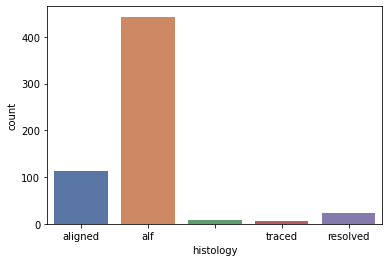

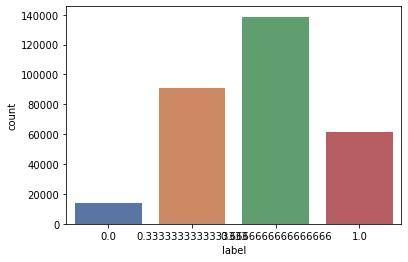

In [11]:
## %%



plt.figure()

sns.countplot(data=df_probes, x='histology', palette='deep')



plt.figure()

sns.countplot(data=df_clusters, x='label',  palette='deep')

In [15]:
#%%



regions = BrainRegions()


#LOCAL_DATA_PATH = Path("/home/joana/Desktop/IBL/Ephys_Atlas/dataframes_features")

OUT_PATH = Path('/home/ibladmin/Documents/PYTHON/int-brain-lab/paper-ephys-atlas/sources/decoding/tests')



df_clusters = pd.read_parquet(LOCAL_DATA_PATH.joinpath('clusters.pqt'))

df_probes = pd.read_parquet(LOCAL_DATA_PATH.joinpath('probes.pqt'))

df_channels = pd.read_parquet(LOCAL_DATA_PATH.joinpath('channels.pqt'))

df_depths = pd.read_parquet(LOCAL_DATA_PATH.joinpath('depths.pqt'))

df_voltage = pd.read_parquet(LOCAL_DATA_PATH.joinpath('raw_ephys_features.pqt'))

In [17]:

df_voltage = pd.merge(df_voltage, df_channels, left_index=True, right_index=True).dropna()

aids_cosmos = regions.remap(df_voltage['atlas_id'], source_map='Allen', target_map='Cosmos')

aids_beryl = regions.remap(df_voltage['atlas_id'], source_map='Allen', target_map='Beryl')

df_voltage['beryl_id'] = aids_beryl

df_voltage['cosmos_id'] = aids_cosmos

In [18]:
df_voltage

rms_lf   psd_delta  \
pid                                  raw_ind                         
f336f6a4-f693-4b88-b12c-c5cf0785b061 1        0.000089  -94.239377   
                                     2        0.000088  -94.322141   
                                     3        0.000088  -94.338916   
                                     8        0.000084  -94.855159   
                                     10       0.000082  -94.993824   
...                                                ...         ...   
17f738d1-b16d-4cd3-8c52-77b08ad2e37f 379      0.000568  -94.123103   
                                     380      0.000048 -101.653320   
                                     381      0.000044 -102.880308   
                                     382      0.000046 -102.449089   
                                     383      0.000045 -103.285468   

                                               psd_theta   psd_alpha  \
pid                                  raw_ind                           
f336f6a4-f693-4b88-b12c-c5cf0785b061 1        -93.656290  -96.530573   
                                     2        -93.686909  -96.698530   
                                     3        -93.719757  -96.653027   
                                     8        -94.073689  -97.235602   
                                     10       -94.243051  -97.448405   
...                                                  ...         ...   
17f738d1-b16d-4cd3-8c52-77b08ad2e37f 379      -89.899695  -91.657917   
                                     380     -100.937274 -102.755558   
                                     381     -101.741580 -103.216843   
                                     382     -101.381428 -103.354616   
                                     383     -101.888934 -103.785816   

                                                psd_beta   psd_gamma  \
pid                                  raw_ind                           
f336f6a4-f693-4b88-b12c-c5cf0785b061 1       -101.085805 -104.523240   
                                     2       -101.382672 -104.745460   
                                     3       -101.256453 -104.605760   
                                     8       -101.963806 -105.012535   
                                     10      -102.250988 -105.215654   
...                                                  ...         ...   
17f738d1-b16d-4cd3-8c52-77b08ad2e37f 379      -95.204774  -83.710302   
                                     380     -105.752082 -107.967440   
                                     381     -106.086336 -109.542340   
                                     382     -106.125546 -108.924410   
                                     383     -106.190550 -108.379910   

                                                rms_ap  alpha_mean  \
pid                                  raw_ind                         
f336f6a4-f693-4b88-b12c-c5cf0785b061 1        0.000018   91.555660   
                                     2        0.000016   82.886347   
                                     3        0.000010  141.028329   
                                     8        0.000011   70.724940   
                                     10       0.000012   81.042026   
...                                                ...         ...   
17f738d1-b16d-4cd3-8c52-77b08ad2e37f 379      0.000011   59.006454   
                                     380      0.000011  208.753526   
                                     381      0.000011  247.539127   
                                     382      0.000010  173.076169   
                                     383      0.000011  251.508174   

                                               alpha_std  spike_rate  ...  \
pid                                  raw_ind                          ...   
f336f6a4-f693-4b88-b12c-c5cf0785b061 1         44.031195    1.033330  ...   
                                     2         30.855219    0.133333  ...   
                                     3      

In [19]:
# Decode brain regions

x_list = ['rms_ap', 'alpha_mean', 'alpha_std', 'spike_rate', 'cloud_x_std', 'cloud_y_std', 'cloud_z_std', 'rms_lf', 'psd_delta', 'psd_theta', 'psd_alpha', 'psd_beta', 'psd_gamma']

X = df_voltage.loc[:, x_list].values

scaler = StandardScaler()

scaler.fit(X)


df_voltage = df_voltage.reset_index()

StandardScaler()

In [21]:
def decode(X, scaler, aids, classifier=None, save_path=None, stratify=df_voltage.pid): # can also be stratify=None

    if classifier is None:

        classifier = MLPClassifier(random_state=1, max_iter=100, verbose=True) # we can play with iteration but the original number was 300

    X_train, X_test, y_train, y_test = train_test_split(X, aids, stratify=stratify) # used to be stratify=aids

    X_train = scaler.transform(X_train)

    X_test = scaler.transform(X_test)

    clf = classifier.fit(X_train, y_train)

    #clf.predict_proba(X_test[:1]) - not needed anymore

    score_model = clf.score(X_test, y_test)

    predictions = clf.predict(X_test)

    y_null = aids_cosmos[np.random.randint(0, aids.size - 1, y_test.size)]

    score_null = clf.score(X_test, y_null)

    return clf, score_model, score_null, predictions, y_test, X_test

In [25]:
'''
# Stratifiers 

 # To do stratification usinG pids we first need to reset the index using this line 
 df_voltage = df_voltage.reset_index() #(done above)

'''

# Random Florest Classifier 

from sklearn.ensemble import RandomForestClassifier

cclas, cs, csn, c_pred, c_true, c_X_test = decode(X, scaler, aids_cosmos, classifier=RandomForestClassifier(verbose=True))

bclas, bs, bsn, b_pred, b_true, c_X_test = decode(X, scaler, aids_beryl, classifier=RandomForestClassifier(verbose=True))

print(bs, bsn, cs, csn)

# 0.5168615851641402 0.03773181030959933 0.6357002471346008 0.11985055167448287 (values for bs, bsn, cs, csn)

# 09-December-2022
# 0.5182237443810932 0.038120998657300204 0.6360699760649167 0.12311973379517017 (values for bs, bsn, cs, csn)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   45.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  3.0min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    4.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_j

0.5182237443810932 0.038120998657300204 0.6360699760649167 0.12311973379517017


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    4.6s finished


In [30]:
c_pred

array([ 315, 1089, 1065, ...,  512, 1089,  315])

In [31]:
c_true

array([ 315,  703, 1065, ...,  512, 1089,    0])

In [81]:
cclas.feature_importances_

array([0.10532996, 0.06802059, 0.0658229 , 0.06071456, 0.05104507,
       0.06163235, 0.05182995, 0.07689086, 0.09100084, 0.08521954,
       0.08972945, 0.0904315 , 0.10233244])

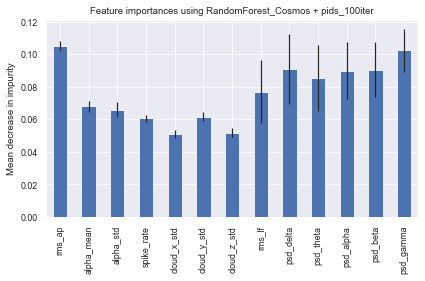

In [35]:
  # Features importance

import matplotlib.pyplot as plt

import seaborn as sns

sns.set_theme('paper')

forest_importances = pd.Series(cclas.feature_importances_, index=x_list)

std = np.std([tree.feature_importances_ for tree in cclas.estimators_], axis=0)

#forest_importances = pd.Series(bclas.feature_importances_, index=x_list)

#std = np.std([tree.feature_importances_ for tree in bclas.estimators_], axis=0)

fig, ax = plt.subplots()

forest_importances.plot.bar(yerr=std, ax=ax)

ax.set_title("Feature importances using RandomForest_Cosmos + pids_100iter")

ax.set_ylabel("Mean decrease in impurity")

fig.tight_layout()

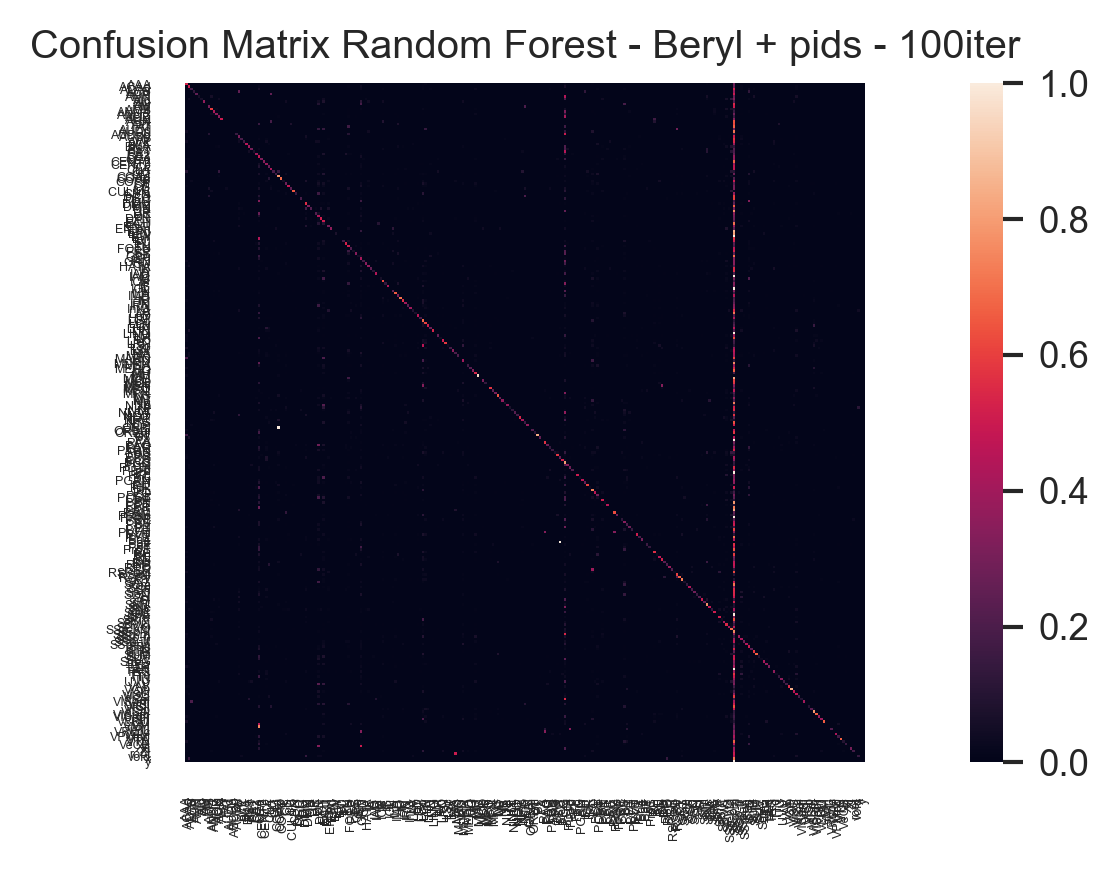

In [63]:
  # Compute confusion matrix 

from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

a = regions.id2acronym(c_true,mapping='Cosmos')
b = regions.id2acronym(c_pred,mapping='Cosmos')
c = regions.id2acronym(b_true,mapping='Beryl')
d = regions.id2acronym(b_pred,mapping='Beryl')


#names = np.unique(np.append(a, b)) # labels for cosmos
names = np.unique(np.append(c, d)) # labels for beryl

cm = confusion_matrix(b_true, b_pred) #Beryl atlas

#cm = confusion_matrix(c_true, c_pred) #Cosmos atlas

cm = cm / cm.sum(1)[:, None]    

f, (ax1) = plt.subplots(1, 1, figsize=(9, 3), dpi=300) #https://romainlhardy.medium.com/estimating-feature-importance-the-easy-way-2ebe970c600c

ax1.imshow(cm,cmap="viridis")

plt.grid(None)

#ax1.set_yticks(range(len(names)), names) #was this
ax1.set_yticks(range(len(names))) #added this

#ax1.set_xticks(range(len(names)), names, rotation='65') #was this
ax1.set_xticks(range(len(names))) #removed names and rotation 09122022
ax1.set_xticklabels(names,rotation=45) #added this line

ax1.tick_params(axis='both', which='major', labelsize=3)

ax1.set(xlabel='Real', ylabel='Predicted', title='Confusion Matrix Random Forest - Beryl + pids - 100iter')

#fig.tight_layout()

sns.despine(trim=False)

sns.heatmap(cm,xticklabels=names,yticklabels=names)

plt.show()

In [ ]:
# PLot feature importance per brain region and class

# Create functions to plot the model and save the plot then add to github --> do it like in guido's code from hackaton --> google it how to save model

    # from joblib import dump -> put your trained model and saves with compresses (=3)

    # set max_depth (how many times it will split the tree)

    # keep changing parameters (reducing the value) until it starts hurting the model 

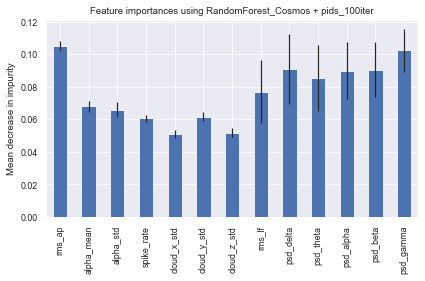

In [64]:
  # Features importance (copy paste from cell above)

sns.set_theme('paper')

forest_importances = pd.Series(cclas.feature_importances_, index=x_list)

std = np.std([tree.feature_importances_ for tree in cclas.estimators_], axis=0)

#forest_importances = pd.Series(bclas.feature_importances_, index=x_list)

#std = np.std([tree.feature_importances_ for tree in bclas.estimators_], axis=0)

fig, ax = plt.subplots()

forest_importances.plot.bar(yerr=std, ax=ax)

ax.set_title("Feature importances using RandomForest_Cosmos + pids_100iter")

ax.set_ylabel("Mean decrease in impurity")

fig.tight_layout()

In [95]:
# # Import tools needed for visualization
# from sklearn.tree import export_graphviz
# import pydot# Pull out one tree from the forest
# tree = cclas.estimators_[5]# Import tools needed for visualization
# from sklearn.tree import export_graphviz
# import pydot# Pull out one tree from the forest
# tree = cclas.estimators_[5]# Export the image to a dot file
# export_graphviz(tree, out_file = 'tree.dot', feature_names = x_list, rounded = True, precision = 1)# Use dot file to create a graph
# (graph, ) = pydot.graph_from_dot_file('tree.dot')# Write graph to a png file
# graph.write_png('tree.png')

In [89]:
cclas.feature_importances_

array([0.10532996, 0.06802059, 0.0658229 , 0.06071456, 0.05104507,
       0.06163235, 0.05182995, 0.07689086, 0.09100084, 0.08521954,
       0.08972945, 0.0904315 , 0.10233244])

In [92]:
x_list

['rms_ap',
 'alpha_mean',
 'alpha_std',
 'spike_rate',
 'cloud_x_std',
 'cloud_y_std',
 'cloud_z_std',
 'rms_lf',
 'psd_delta',
 'psd_theta',
 'psd_alpha',
 'psd_beta',
 'psd_gamma']

In [98]:
 tree = cclas.estimators_[5]

In [ ]:
import graphviz
graphviz.Source.from_file('tree.dot')